In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
import os

In [2]:
new='Documents/Sales_Data'
df= pd.read_csv('Documents\Sales_Data\Sales_April_2019.csv')
files= [file for file in os.listdir('Documents\Sales_Data')]
all_months=pd.DataFrame()
for file in files:
    dm=pd.read_csv(new+'/'+file)
    all_months=pd.concat([all_months,dm])

all_months.to_csv('all_months.csv',index=False)

In [3]:
all_data=pd.read_csv('all_months.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.dropna()
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [5]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data[all_data.isna().any(axis=1)]
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [6]:
all_data=all_data[all_data['Month']!='Or']
all_data.drop_duplicates()
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [7]:
all_data['Month']=all_data['Month'].astype(int)



In [8]:
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data.dtypes
all_data["Sales"]=all_data['Quantity Ordered']*all_data['Price Each']

#### MAX SALES MONTH_WISE

In [10]:
Max_sales=all_data.groupby(['Month']).sum()
Max_sales 

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


#### PLOT THE TOTAL SALES USING BAR GRAPH

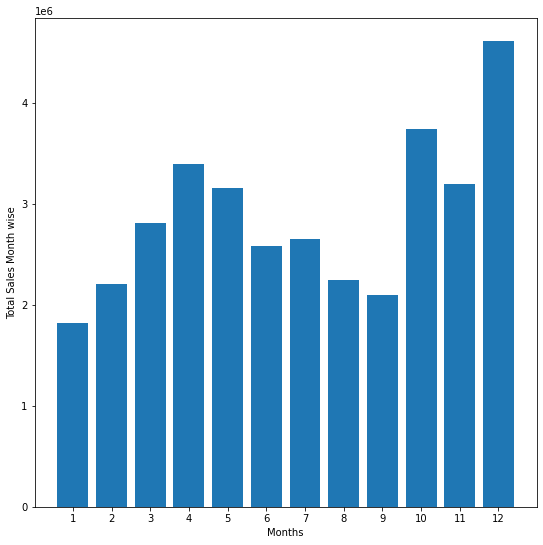

In [11]:
Max_sales.dtypes
month=range(1,13)

plt.figure(figsize=(9,9))
plt.bar(month,Max_sales['Sales'])
plt.xticks(month)
plt.xlabel('Months')
plt.ylabel('Total Sales Month wise')
plt.show()

#### WHICH CITY HAD THE HIGHEST SALES?

#### CITY WISE HIGHEST SALES GRAPH

#### GET CITY COLUMN

In [13]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"]=all_data['Purchase Address'].apply(lambda x:get_city(x) + '(' + get_state(x) + ')')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


In [14]:
New_city=all_data.groupby('City').sum().reset_index()
New_city

,City,Quantity Ordered,Price Each,Month,Sales
0,Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
1,Austin(TX),11153,1.809874e+06,69829,1.819582e+06
2,Boston(MA),22528,3.637410e+06,141112,3.661642e+06
3,Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
4,Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
5,New York City(NY),27932,4.635371e+06,175741,4.664317e+06
6,Portland(ME),2750,4.471893e+05,17144,4.497583e+05
7,Portland(OR),11303,1.860558e+06,70621,1.870732e+06
8,San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06
9,Seattle(WA),16553,2.733296e+06,104941,2.747755e+06


#### PLOT A BAR GRAPH TO GET CITY WISE HIGHEST SALES

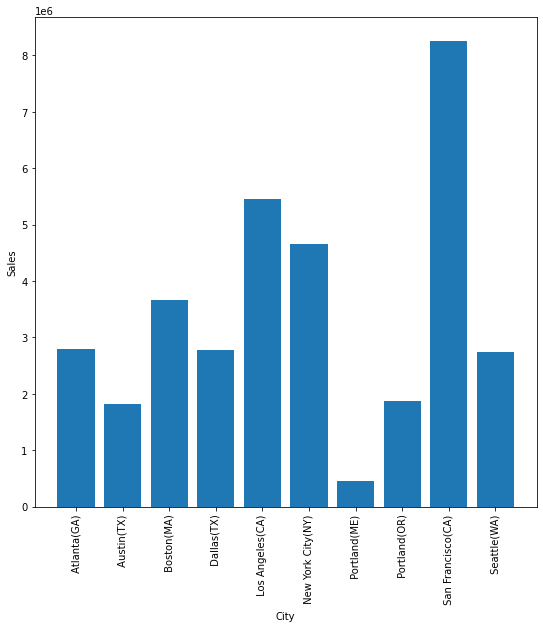

In [15]:
plt.figure(figsize=(9,9))
plt.bar(New_city['City'],New_city['Sales'])
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Sales')
plt.show()

#### WHAT TIME SHOULD WE ADVERTISE TO MAXIMIZE CUSTOMER BUYING? 

In [16]:
 all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [17]:
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data["Count"]=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27,1


NameError: name 'hours' is not defined

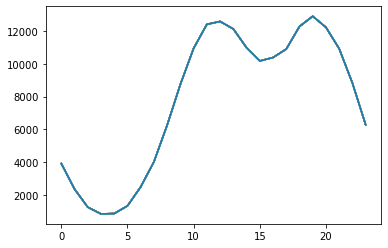

In [22]:
all_data.sort_values(by=['Hour'])['Hour'].unique()
plt.plot(all_data.sort_values(by=['Hour'])['Hour'].unique(),all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('No. of orders')
plt.grid()
plt.show()

In [24]:
dupli=all_data[all_data['Order ID'].duplicated(keep=False)]
dupli.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,1
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,42,1
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31,1
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31,1
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco(CA),17,0,1
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco(CA),17,0,1
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City(NY),11,7,1
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City(NY),11,7,1


In [25]:
dupli.groupby(['Order ID'])['Product'].transform(lambda x:','.join(x))

3                             Google Phone,Wired Headphones
4                             Google Phone,Wired Headphones
18                        Google Phone,USB-C Charging Cable
19                        Google Phone,USB-C Charging Cable
30        Bose SoundSport Headphones,Bose SoundSport Hea...
                                ...                        
186792         34in Ultrawide Monitor,AA Batteries (4-pack)
186803              Wired Headphones,AAA Batteries (4-pack)
186804              Wired Headphones,AAA Batteries (4-pack)
186841                    Google Phone,USB-C Charging Cable
186842                    Google Phone,USB-C Charging Cable
Name: Product, Length: 14649, dtype: object

In [26]:
dupli['Grouped']=dupli.groupby('Order ID')['Product'].transform(lambda x:','.join(x))

<ipython-input-26-e9dd09b311f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupli['Grouped']=dupli.groupby('Order ID')['Product'].transform(lambda x:','.join(x))


In [27]:
dupli[dupli['Order ID'].duplicated()].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Count,Grouped
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,1,"Google Phone,Wired Headphones"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,42,1,"Google Phone,USB-C Charging Cable"
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31,1,"Bose SoundSport Headphones,Bose SoundSport Hea..."
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco(CA),17,0,1,"AAA Batteries (4-pack),Google Phone"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City(NY),11,7,1,"Lightning Charging Cable,USB-C Charging Cable"


In [28]:
dupli=dupli[['Order ID','Grouped']]
dupli.drop_duplicates(inplace=True)
dupli.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [29]:
dupli['Count']=1
new_1=dupli.groupby('Grouped').count().sort_values(by=['Count'],ascending=False).reset_index()
new_1.head()

,Grouped,Order ID,Count
0,"iPhone,Lightning Charging Cable",882,882
1,"Google Phone,USB-C Charging Cable",856,856
2,"iPhone,Wired Headphones",361,361
3,"Vareebadd Phone,USB-C Charging Cable",312,312
4,"Google Phone,Wired Headphones",303,303


In [30]:
new_2=new_1['Grouped'].str.split(',',expand=True)
new_2.head()

,0,1,2,3,4
0,iPhone,Lightning Charging Cable,None,None,None
1,Google Phone,USB-C Charging Cable,None,None,None
2,iPhone,Wired Headphones,None,None,None
3,Vareebadd Phone,USB-C Charging Cable,None,None,None
4,Google Phone,Wired Headphones,None,None,None


In [31]:
group_4=new_2.loc[0:,0:3]
group_4.dropna(inplace=True)
group_4['Toon']=group_4[0]+','+group_4[1]+','+group_4[2]+','+group_4[3]
group_4['counter']=1
group_4.groupby(['Toon']).count().sort_values(by=['counter'],ascending=False)

#Similarly we can calculate for group of 2 and 3.

,0,1,2,3,counter
Toon,,,,,
"iPhone,Lightning Charging Cable,Apple Airpods Headphones,Wired Headphones",2,2,2,2,2
"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,34in Ultrawide Monitor",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Bose SoundSport Headphones,Wired Headphones",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Wired Headphones,AA Batteries (4-pack)",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Wired Headphones,Apple Airpods Headphones",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Wired Headphones,Wired Headphones",1,1,1,1,1
"Google Phone,USB-C Charging Cable,Wired Headphones,iPhone",1,1,1,1,1


#### Different method for grouping

In [32]:
dupli.head()

,Order ID,Grouped,Count
3,176560,"Google Phone,Wired Headphones",1
18,176574,"Google Phone,USB-C Charging Cable",1
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea...",1
32,176586,"AAA Batteries (4-pack),Google Phone",1
119,176672,"Lightning Charging Cable,USB-C Charging Cable",1


#### HOW MANY OF THEM BOUGHT 2,3,4 SAME ITEMS?

In [35]:
from itertools import combinations
from collections import Counter

count= Counter()
for row in dupli['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
                 
print(count)


Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [36]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [37]:
for keys,values in count.most_common(10):
    print(keys,values)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [38]:
count=Counter()
for row in dupli['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,3)))

for keys,values in count.most_common(10):
    print(keys,values)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


In [39]:
count=Counter()
for row in dupli['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,4)))

for keys,values in count.most_common(20):
    print(keys,values)

('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones') 4
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 3
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 2
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'USB-C Charging Cable') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'AA Batteries (4-pack)') 1
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones', '34in Ultrawide Monitor') 1
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones', 'Apple Airpods Headphones') 1
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones', 'Google Phone') 1
('iPhone', 'Lightning Charging Cable', 'Wired Headphones', 'Google Phone') 1
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Lightning Charging Cable', 'Apple Airpods Headphones', 'Wired Headphones', 'Google Phone') 1
('Google Phone', 'USB-C C

#### WHAT PRODUCT SOLD THE MOST AND WHY? 

In [40]:
Max_Quan=all_data.groupby('Product').sum().reset_index()
Max_Quan.head()

,Product,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
0,20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
1,27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
2,27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
3,34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
4,AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577


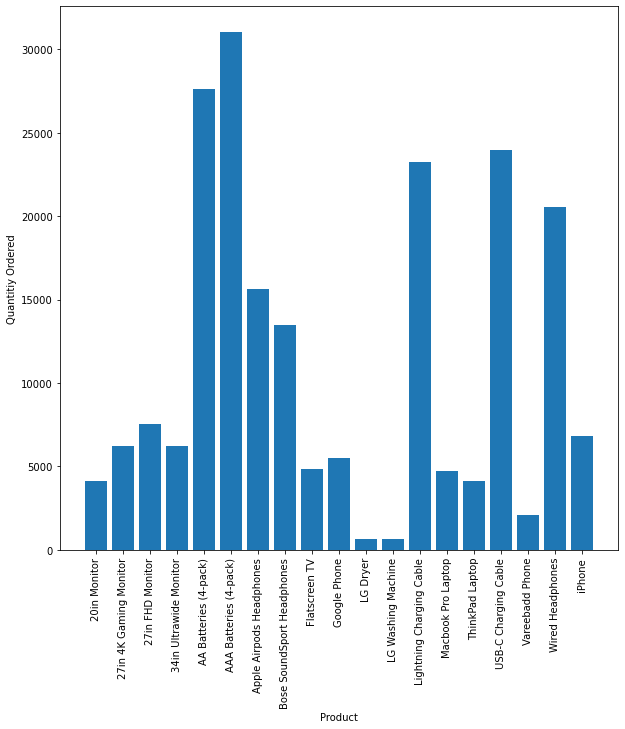

In [41]:
plt.figure(figsize=(10,10))
plt.bar(Max_Quan['Product'],Max_Quan['Quantity Ordered'])
plt.xlabel('Product')
plt.ylabel('Quantitiy Ordered')
plt.xticks(rotation=90)
plt.show()

In [42]:
Max_Quan.head()
Max_Quan['Avg_Price']=Max_Quan['Sales']/Max_Quan['Quantity Ordered']



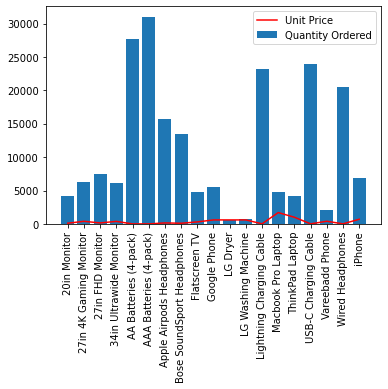

In [47]:
plt.bar(Max_Quan['Product'],Max_Quan['Quantity Ordered'])
plt.plot(Max_Quan['Product'],Max_Quan['Avg_Price'],'r-')
plt.legend(["Unit Price", "Quantity Ordered"])
plt.xticks(rotation=90)
plt.show()

<ipython-input-44-c0a8a79c097f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Max_Quan['Product'],rotation=90)


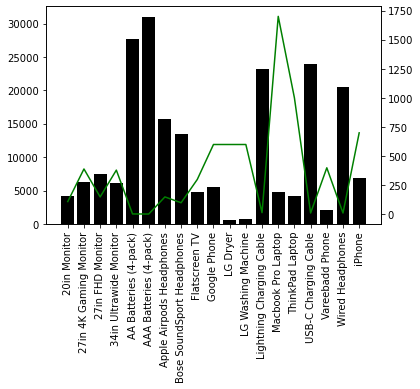

In [44]:
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(Max_Quan['Product'],Max_Quan['Quantity Ordered'],color='black')
ax2.plot(Max_Quan['Product'],Max_Quan['Avg_Price'],'g-')
ax1.set_xticklabels(Max_Quan['Product'],rotation=90)
plt.show()